In [5]:
import pandas as pd

df = pd.read_pickle('20190325-215555.pkl')
df.columns

Index(['Intake Date', 'Source', 'Species', 'Group', 'Size', 'Outcome',
       'Cause of Death (if applicable)', 'Housing Need'],
      dtype='object')

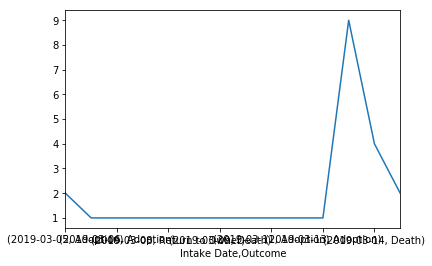

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

df.groupby('Intake Date')['Outcome'].value_counts().plot()

In [15]:
df['Outcome'].value_counts().keys()

Index(['Adoption', 'Death', 'Return to Owner', 'Transfer'], dtype='object')